## Running in Colab
You can run this notebook in Google Colab [HERE](https://colab.research.google.com/github/Local-eRewards/itpminer/blob/main/demo.ipynb)

PIP install itpminer

In [1]:
!pip install itpminer

Import itpminer and create a dummy database of inter transactions

In [2]:
from itpminer.utils import association_rules, rules_graph
from itpminer import itp_miner

database = [
    ["a", "b"],
    ["a", "c", "d"],
    ["a"],
    ["a", "b", "c", "d"],
    ["a", "b", "d"],
    ["a", "d"]
]

Mine frequent inter-transactional patterns

In [3]:
tree_dict, frequent_patterns_dict, frequent_patterns_list, frequent_patterns_dataframe = itp_miner(
    database=database)
frequent_patterns_dataframe

,Pattern,Support
0,(),1.000000
1,"((0, a),)",1.000000
2,"((0, b),)",0.500000
3,"((0, d),)",0.666667
4,"((0, a), (1, a))",0.833333
5,"((0, a), (0, b))",0.500000
6,"((0, a), (0, d))",0.666667
7,"((0, a), (1, d))",0.666667
8,"((0, a), (0, b), (1, a))",0.500000
9,"((0, a), (0, b), (1, d))",0.500000


Derive association rules from frequent patterns

In [4]:
rules_dict, rules_display_dict, rules_dataframe = association_rules(
    tree_dict=tree_dict)
rules_dataframe

,A,sup_A,B,sup_B,A_and_B,sup_A_and_B,conf,lift
0,"{a(0), a(1)}",0.833333,{d(1)},0.666667,"{a(0), a(1), d(1)}",0.666667,0.800000,1.2
1,{a(0)},1.000000,{b(0)},0.500000,"{a(0), b(0)}",0.500000,0.500000,1.0
2,"{a(0), b(0)}",0.500000,{a(1)},1.000000,"{a(0), b(0), a(1)}",0.500000,1.000000,1.0
3,"{a(0), b(0), a(1)}",0.500000,{d(1)},0.666667,"{a(0), b(0), a(1), d(1)}",0.500000,1.000000,1.5
4,"{a(0), b(0)}",0.500000,{d(1)},0.666667,"{a(0), b(0), d(1)}",0.500000,1.000000,1.5
5,{a(0)},1.000000,{d(0)},0.666667,"{a(0), d(0)}",0.666667,0.666667,1.0
6,{a(0)},1.000000,{d(1)},0.666667,"{a(0), d(1)}",0.666667,0.666667,1.0
7,{b(0)},0.500000,{a(1)},1.000000,"{b(0), a(1)}",0.500000,1.000000,1.0
8,"{b(0), a(1)}",0.500000,{d(1)},0.666667,"{b(0), a(1), d(1)}",0.500000,1.000000,1.5
9,{b(0)},0.500000,{d(1)},0.666667,"{b(0), d(1)}",0.500000,1.000000,1.5


Plot a network graph between extended items

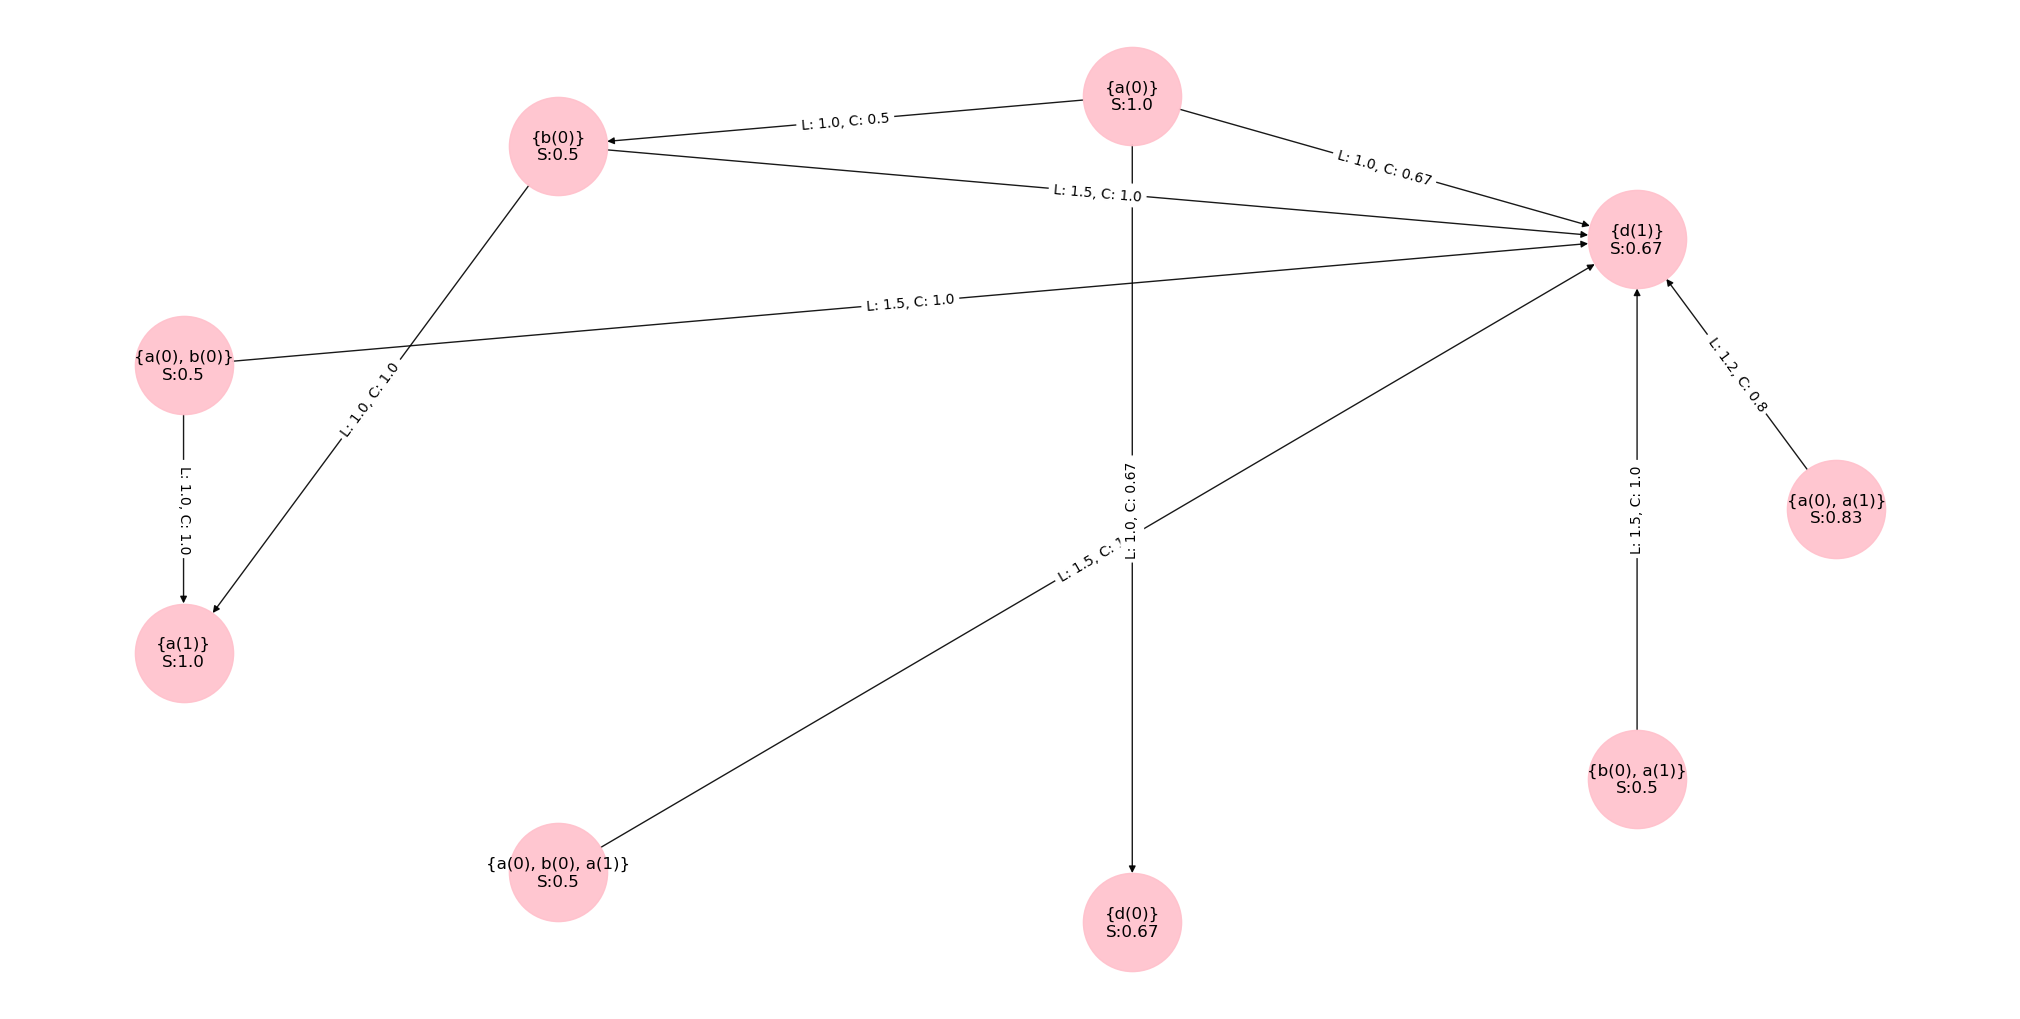

In [5]:
rules_graph(rules_display_dict=rules_display_dict, rules_dict=rules_dict)